In [13]:
import ollama 
import os
from tqdm import tqdm

In [9]:
images_path = '/home1/goowfd/CVPR_2025/hateful_memes/img/'

list_of_image_names = os.listdir(images_path)

In [7]:
def check_yes_no(text):
    # Strip any leading/trailing whitespace and convert to lowercase
    text = text.strip().lower()

    # Check if the text starts with 'yes' or 'no'
    if text.startswith("yes"):
        return 1
    elif text.startswith("no"):
        return 0
    else:
        return None  

In [8]:
list_of_models = ['llava:7b', 
                  'llava:13b',
                  'llava:34b',
                  'llava-llama3',
                  'bakllava',
                  'moondream',
                  'minicpm-v',
                  'llava-phi3']

ollama.pull('llava:7b') #pull the desired model

In [21]:
root_path = '/home1/goowfd/CVPR_2025/hateful_memes/img/'

options= {  # new
            "seed": 123,
            "temperature": 0,
            "num_ctx": 2048, # must be set, otherwise slightly random output
        }
    
llava_7b_labels = {}

for image_name in tqdm(list_of_image_names):
    
    image_path = os.path.join(root_path, image_name)
    
    prompt = "Is this an offensive meme? Please answer with YES or NO. DO NOT mention the reason: "
#     prompt = "Is there ? Please answer with YES or NO. DO NOT mention the reason: "
#     prompt = "Is this somehow an offensive meme? Please answer with YES or NO: "
#     prompt = "describe this image: "
    
    response = ollama.generate(model='llava:7b', prompt=prompt, images=[image_path], options=options)
    
#     response = ollama.chat(model='llava:34b', messages=[
#       {
#         'role': 'user',
#         'content': prompt,
#       }, 
#     ], options= {  # new
#             "seed": 123,
#             "temperature": 0,
#             "num_ctx": 2048, # must be set, otherwise slightly random output
#         })
    # print(response)
#     print(prompt)
#     print("------------------------------------------------------")
#     print(image_name)
    
    label = check_yes_no(response['response'])
    
#     print(label)
    
    llava_7b_labels[image_name] = label
    
#     break


  0%|                                                                                                       | 11/10000 [00:08<2:10:36,  1.27it/s]


KeyboardInterrupt: 

In [22]:
llava_7b_labels

{'48132.png': 0,
 '01527.png': 0,
 '47196.png': 1,
 '79312.png': 1,
 '50738.png': 1,
 '86593.png': 0,
 '51473.png': 1,
 '93614.png': 0,
 '50723.png': 1,
 '14829.png': 1,
 '98653.png': 0}

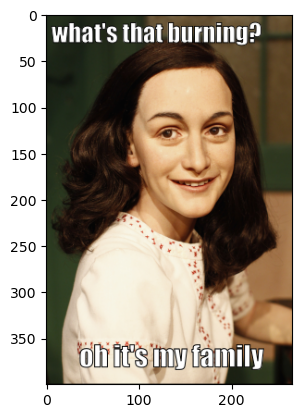

In [31]:
import matplotlib.pyplot as plt
import PIL 

image = PIL.Image.open(os.path.join(root_path, '98653.png'))
plt.imshow(image)

In [33]:
results_file_name = 'llava_test' + '_test.json'
import json
with open(results_file_name, 'w') as fp:
    json.dump(llava_7b_labels, fp)